# Main File

To sort file, increment by 1 the 2nd character.<br>If need to add an intermediate step: une the bisector (forward or backward) on the 3th character ( eg: forward M -> G , backward M->T)  <br> A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [1]:
#!pip install imgkit

In [2]:
from pathlib import Path
from IPython.display import display, HTML
import joblib
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
sns.set_theme(style="whitegrid", palette="Set2")

The process 'preprocess_01MM' take a lot of time therefore it is better to run it once.  
The result is saved in a file for later used.

## preprocess_01MM : Limites Administratives

In [4]:
# %run ./preprocess_01MM.ipynb

## preprocess_02MM : Arrondissements

(186, 5)


,IdenfiantSecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement
0,4,RDP-91,17,RDP,R.D.P. / P.A.T.
1,4,RDP-91,17,RDP,R.D.P. / P.A.T.
2,5,RDP-92,17,RDP,R.D.P. / P.A.T.


(34, 9)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ..."
1,33,Pointe-Claire,66097,8,PC,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.76847 45.41859, -73.77866 ..."
2,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ..."


,ArrondissementCode,Arrondissement
0,RDP,R.D.P. / P.A.T.
19,VMA,Ville-Marie
24,S-O,Sud-Ouest
27,PMR,Plateau Mont-Royal
34,AHU,Ahuntsic / Cartierville
55,RPP,Rosemont / Petite-Patrie
74,VSP,Villeray / St-Michel / Parc-Extension
82,CDN,Côte-des-Neiges / Notre-Dame-de-Grâce
89,MHM,Mercier / Hochelaga / Maisonneuve
99,ANJ,Anjou


   ArrondissementCode ABREV
0                 RDP    RP
1                 VMA    VM
2                 S-O    SO
3                 PMR    PM
4                 AHU    AC
5                 RPP    RO
6                 VSP    VS
7                 CDN    CN
8                 MHM    MH
9                 ANJ    AJ
10                LAC    LC
11                LAS    LS
12                MTN    MN
13                OUT    OM
14                PRF    PR
15                SLA    LR
16                SLE    LN
17                VER    VD
18                IBI    IS
19                WES    WM
Index(['CODEID', 'NOM', 'CODEMAMH', 'NUM', 'ABREV', 'TYPE', 'COMMENT',
       'DATEMODIF', 'geometry', 'ArrondissementCode'],
      dtype='object')
(20, 10) (34, 38) (20, 49)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,ArrondissementCode,...,streets_per_node_counts_8,streets_per_node_proportions_8,streets_per_node_counts_9,streets_per_node_proportions_9,streets_per_node_counts_10,streets_per_node_counts_11,streets_per_node_counts_12,streets_per_node_proportions_10,streets_per_node_proportions_11,streets_per_node_proportions_12
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ...",ANJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ...",RPP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,Westmount,66032,4,WM,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.59513 45.47645, -73.59469 ...",WES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,Mercier-Hochelaga-Maisonneuve,REM22,23,MH,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.56970 45.59660, -73.56947 ...",MHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Le Sud-Ouest,REM20,21,SO,Arrondissement,Il est important de noter que la limite située...,2022-08-24,"MULTIPOLYGON (((-73.63530 45.45078, -73.63524 ...",S-O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(20, 49) (186, 5) (186, 53)


/var/folders/ml/k9khjmr57qqcw3y03b7k154c0000gn/T/ipykernel_33123/867976642.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adm_feat.to_latex(filename)


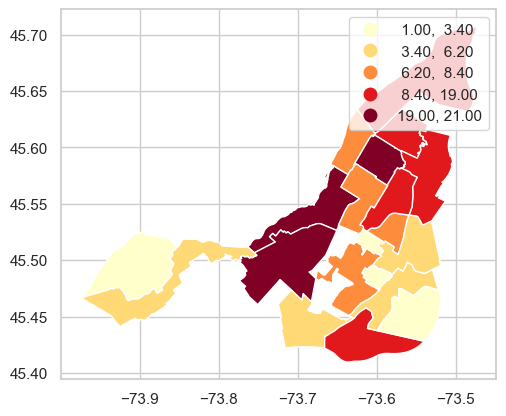

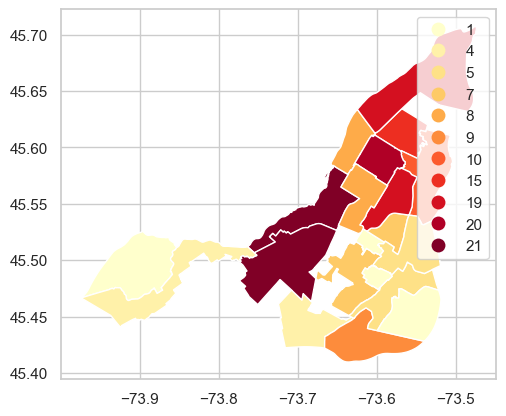

,secteur_count,area
ArrondissementCode,,
AHU,21,5.214740e+07
SLA,21,8.764706e+07
SLE,20,2.759526e+07
RDP,19,1.049463e+08
RPP,19,3.239825e+07
ANJ,15,2.839600e+07
MHM,10,5.594018e+07
LAS,9,5.118610e+07
VSP,8,3.361519e+07


THE END of preprocess 02MM


/var/folders/ml/k9khjmr57qqcw3y03b7k154c0000gn/T/ipykernel_33123/273021942.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  frame.to_latex(filename)


In [5]:
%run ./preprocess_02MM.ipynb

In [6]:
adm_features.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   CODEID                           20 non-null     int64   
 1   NOM                              20 non-null     object  
 2   CODEMAMH                         20 non-null     object  
 3   NUM                              20 non-null     int64   
 4   ABREV                            20 non-null     object  
 5   TYPE                             20 non-null     object  
 6   COMMENT                          2 non-null      object  
 7   DATEMODIF                        20 non-null     object  
 8   geometry                         20 non-null     geometry
 9   ArrondissementCode               20 non-null     object  
 10  index                            20 non-null     object  
 11  n                                20 non-null     int64   
 12  m 

In [7]:
#adm_secteur.info() # Not neede yet

In [8]:
## preprocess_03MM : ????

In [9]:
# %run ./preprocess_03MM.ipynb

In [10]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)

from sklearn import metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GroupShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import  Lasso, LassoLarsIC, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector

In [11]:
# view : https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html
from sklearn import set_config, config_context
#set_config(transform_output="pandas")

In [12]:
#X_train, X_test, rest_train, rest_test = train_test_split(X, rest, test_size=0.30, random_state=42
#                                                    , stratify=gdf[y_cluster[0]])

y_train = adm_features['ArrondissementCode']
y_train = adm_features['NOM']
X_train = adm_features.drop(columns=['geometry','index','NOM','CODEID','CODEMAMH','NUM','ABREV','DATEMODIF','ArrondissementCode']).copy()
print(X_train.columns)

In [13]:
def projectTSNE(X,n_components=2, random_state=0,  perplexity=None ):
    e = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity )
    return e.fit_transform(X)


class Model(Pipeline):
    
    def labels(self):
        return self['estimator'].labels_
        
    def project(self, n_components=2, random_state=0,  perplexity=None):
         return projectTSNE(self['transformer'].X_transformed_fit_,n_components=n_components, 
                            random_state=random_state,perplexity=perplexity)
        
    def plot_pipeline(self,filename, df):
        from mlinsights.plotting import pipeline2dot
        from pyquickhelper.loghelper import run_cmd
        dot = pipeline2dot(self, df)
        with open(filename, "w", encoding="utf-8") as f:
            f.write(dot)
        cmd = "dot -G=300 -Tpng {0} -o{0}.png".format(filename)
        run_cmd(cmd, wait=True, fLOG=print);

def build_pipeline(estimator, transformer, scaling=True, transformer_weights=None):
    """ Build a robust pipeline with the given estimator model
    Keyword arguments:
    scaling -- whether or not to scale the data
    
    Returns: a pipeline
    """
    cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                             OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    num_pipe = make_pipeline(SimpleImputer(strategy='median'))
    
    numerical = make_column_selector(dtype_include=np.number)
    #categorical = make_column_selector(dtype_include=object)
    categorical = make_column_selector(dtype_exclude=np.number)    
    
    if scaling:
        num_pipe.steps.insert(1,["scaler", MinMaxScaler()]) 
        
    if estimator.__class__.__name__ == 'MeanShift':
        # The following bandwidth can be automatically detected using
        bandwidth = estimate_bandwidth(quantile=0.2, n_samples=500)
        estimator.set_params('bndwidth',bandwidth)

    preprocess = ColumnTransformer([('cat',cat_pipe, categorical),
                                    ('num',num_pipe,numerical)],
                                   remainder="drop",#"passthrough",
                                  transformer_weights=transformer_weights)
     
    # Give a name to the estimator and last transformer so that we can tune it more easily
    return Model(steps=[('preprocess', preprocess), ('transformer',transformer)
                           , ('estimator', estimator)]
                   )

    #preprocess = make_column_transformer((cat_pipe, categorical),(num_pipe,numerical), remainder="passthrough")    
    #combined = FeatureUnion(estimators)

In [21]:
# TODO: adjust: transformer_weights between geo* and *time*

transformer =  KernelPCA(n_components=3, kernel="rbf", gamma=10, alpha=0.1,
                         fit_inverse_transform=True)

estimator = KMeans(n_clusters=4, random_state=0, n_init="auto")

n_neighbors = 8

filename = Path('..','media','pipeline_clustering')

model = build_pipeline(estimator=estimator, transformer= transformer, scaling=True)
#model.feature_names_in = X_train.columns.to_list()
#model.set_output(transform='pandas')

display(model)

In [19]:
def my_silhouette_score(model, X, y=None):
    preds = model.predict(X)
    print(preds)
    return metrics.silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')
    #sc = metrics.silhouette_score(X, preds)
    print(sc)
    return sc

pgrid = {
    'estimator__n_clusters': np.arange(2, 10),
    #'transformer__n_components': np.arange(2, 10)
}

gs = GridSearchCV(model, pgrid, scoring=my_silhouette_score, cv=2)
gs.fit(X_train)
best_estimator = gs.best_estimator_
print(best_estimator)
highest_silhouette_score = gs.score(X_train)
print(highest_silhouette_score)

#print(model.get_params('composite__visualizer__perplexity'))
 Test 1 : NO position = StandardScaler().fit_transform(position)
 Test 2: Still on the top of each other
n_neighbors = 2
man = SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
position = man.fit_transform(position)
man = Isomap(n_neighbors=n_neighbors, n_components=2)
position = man.fit_transform(position)

In [ ]:
model.fit(X_train)
proj = model.project(n_components=2, perplexity=n_neighbors)

with config_context(transform_output="pandas"):
    reduced_data = model.transform(X_train)
    #display(reduced_data.head())    

labels = model.labels()
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

reduced_data['group'] = labels
reduced_data['Arrondissement'] = y_train
reduced_data['area'] = adm_features['area']
reduced_data['manifold0'] = proj[:,0]
reduced_data['manifold1'] = proj[:,1]


sort = reduced_data.sort_values("group", ascending=False)
display(sort)


filename = Path('..','media','clustering_redu'+str(n_clusters_)+'.png')

#sns.set(style="darkgrid")
sns.set_theme(style="whitegrid", palette="Set1")

fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(
#g = sns.regplot(    
    data=reduced_data,
    x="manifold0", y="manifold1",
    hue="group", style="group",
    #size="area",
    s=300,
    palette="Set2")

#ax.set(xscale="log", yscale="log")

for i,d in reduced_data.T.items():
    plt.text(d['manifold0'],d['manifold1'],d['Arrondissement'], horizontalalignment='left', size='small', color='black')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.show()

fig.savefig(filename)  

In [ ]:
# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {"silhouette": metrics.silhouette_score(metric='euclidean')}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"estimator__k": range(1, 20, 1)},
    scoring=scoring,
    refit="silhouette",
    n_jobs=2,
    return_train_score=True,
)


gs.fit(X_train)
results = gs.cv_results_
display(results)

In [ ]:
# Why T-Sne https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
#p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
#t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
#indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))

#colors = nlabels

#x, y, z = (
#    np.sin(t[indices]) * np.cos(p[indices]),
#    np.sin(t[indices]) * np.sin(p[indices]),
#    np.cos(t[indices]),
#)
sphere_data = model['transformer'].X_transformed_fit_
x = sphere_data[:,0]
y = sphere_data[:,1]
z = sphere_data[:,2]

# Plot our dataset.
fig = plt.figure(figsize=(12, 6))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y,z)
ax.view_init(40, -10)



# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    #print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1])
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
#print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1])
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1, normalized_stress="auto")
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
#print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1])
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
#print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1])
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=0, perplexity=n_neighbors)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
#print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1])
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()

https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html#sphx-glr-auto-examples-cluster-plot-inductive-clustering-py  
Clustering then Classification    

# COULD  USE SECTORS instead of ARRONDISSEMENTS IN ORDER TO INCREASE THE NUMBER OF SAMPLES



# ALSO HOW TO IMPROVE https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
